Lasso Regression - R²: 0.48, MSE: 0.68

 Selected Features (Non-zero Coefficients):
['MedInc', 'HouseAge', 'Latitude']

 Features Eliminated by Lasso:
['AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


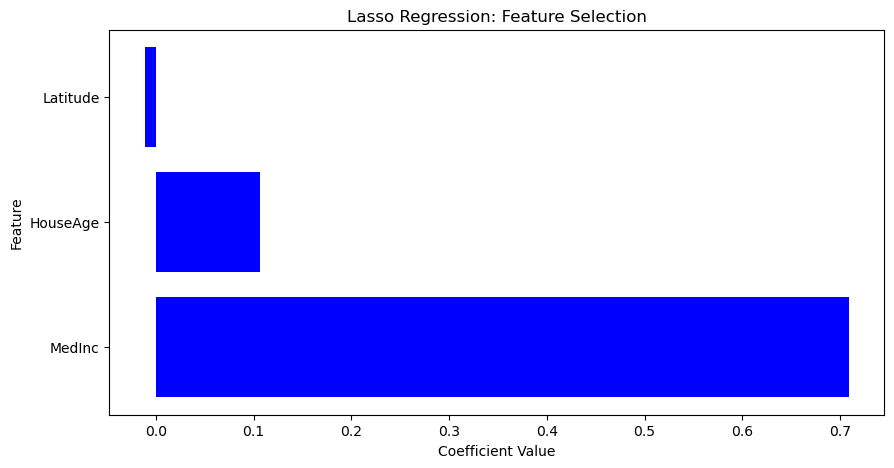

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop(columns=["MedHouseVal"]) 
y = df["MedHouseVal"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

coefficients = lasso_model.coef_
selected_features = X.columns[coefficients != 0]
zero_features = X.columns[coefficients == 0]

y_pred = lasso_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Lasso Regression - R²: {r2:.2f}, MSE: {mse:.2f}")
print("\n Selected Features (Non-zero Coefficients):")
print(selected_features.tolist())

print("\n Features Eliminated by Lasso:")
print(zero_features.tolist())

plt.figure(figsize=(10, 5))
plt.barh(selected_features, coefficients[coefficients != 0], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Lasso Regression: Feature Selection")
plt.show()
